In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
img_size = (150, 150)
batch_size = 32

# Data generators for training and validation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    'flowers/',  # Path to the main folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary for two classes
    subset='training'  # Set to training subset
)

val_data = data_gen.flow_from_directory(
    'flowers/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Set to validation subset
)


Found 1215 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load the base model with pre-trained weights
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the layers to use as feature extractor

# Build the custom model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary output for sunflower or rose
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\pc\AppData\Local\Temp\ipykernel_55052\1383044743.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Train the model
epochs = 10  # Adjust epochs based on data size and convergence
history = model.fit(train_data, validation_data=val_data, epochs=epochs)


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 661ms/step - accuracy: 0.7400 - loss: 0.5041 - val_accuracy: 0.9139 - val_loss: 0.2324
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 393ms/step - accuracy: 0.9260 - loss: 0.1755 - val_accuracy: 0.9272 - val_loss: 0.1815
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 419ms/step - accuracy: 0.9545 - loss: 0.1163 - val_accuracy: 0.9305 - val_loss: 0.1738
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - accuracy: 0.9590 - loss: 0.1036 - val_accuracy: 0.9338 - val_loss: 0.1549
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 368ms/step - accuracy: 0.9709 - loss: 0.0810 - val_accuracy: 0.9338 - val_loss: 0.1527
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 378ms/step - accuracy: 0.9831 - loss: 0.0689 - val_accuracy: 0.9371 - val_loss: 0.1330
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.9839 - loss: 0.0616 - val_accuracy: 0.9404 - val_loss: 0.1291
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step - accuracy: 0.9855 - loss: 0.0580 - val_accu

In [4]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.9359 - loss: 0.1326
Validation accuracy: 93.71%


In [5]:
model.save('flower_classifier.h5')


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = 'rosestest.jpg'
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Predicted class: Sunflower")
else:
    print("Predicted class: Rose")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: Rose


In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

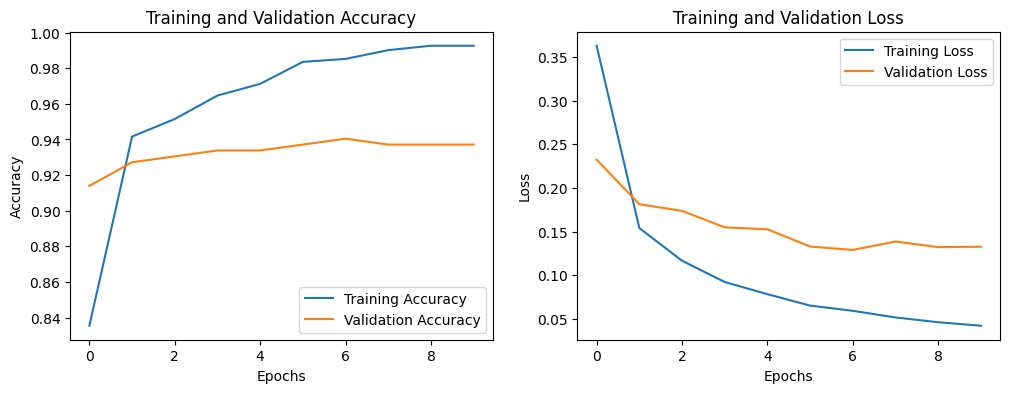

In [27]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step


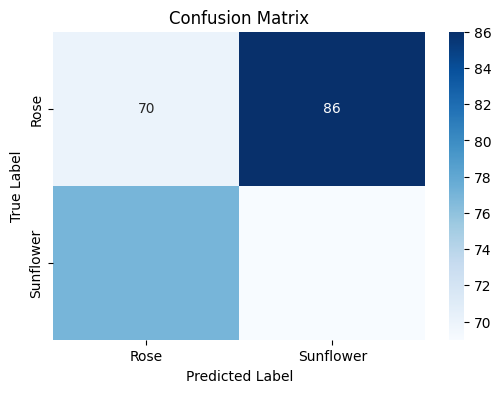

In [28]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions on the validation set
val_labels = val_data.classes  # True labels
val_preds = model.predict(val_data)
val_preds = np.where(val_preds > 0.5, 1, 0).flatten()  # Binary threshold

# Create the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rose', 'Sunflower'], yticklabels=['Rose', 'Sunflower'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


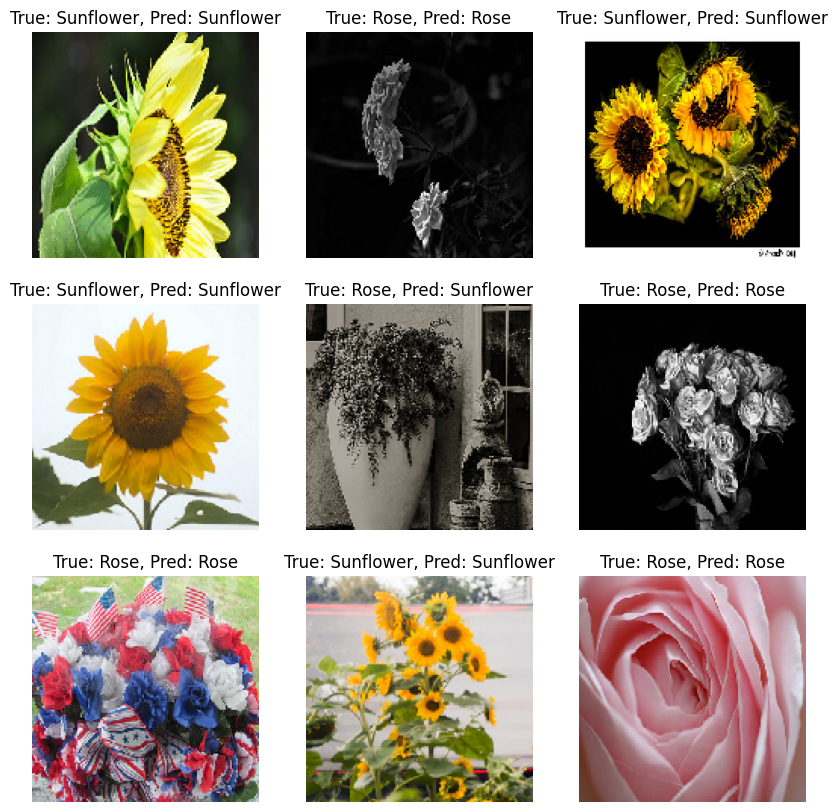

In [30]:
import random
import matplotlib.pyplot as plt

# Get a sample of images and their labels
def display_sample_predictions(val_data, model, num_samples=9):
    # Get the number of batches in the validation data
    num_batches = len(val_data)
    
    # Randomly select a batch index
    random_batch_index = random.randint(0, num_batches - 1)
    
    # Get the batch of images and labels
    val_data.reset()  # Reset the iterator to the start
    for _ in range(random_batch_index):
        next(val_data)  # Skip to the random batch

    img_batch, label_batch = next(val_data)  # Get the selected batch

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        img_array = img_batch[i]  # Get the image
        true_label = 'Sunflower' if label_batch[i] == 1 else 'Rose'
        
        # Make a prediction for the image
        pred_label = model.predict(img_batch[i:i+1])
        pred_label = 'Sunflower' if pred_label[0][0] > 0.5 else 'Rose'
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_array)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.show()

# Call the function to display sample predictions
display_sample_predictions(val_data, model, num_samples=9)


In [34]:
import shap

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, val_data)  # Use the validation data as background

# Select a few images to explain (the first 10 images from the validation set)
sample_images, _ = next(val_data)  # Get a batch of images
sample_images = sample_images[:10]  # Select the first 10 images

# Calculate SHAP values
shap_values = explainer.shap_values(sample_images)


AttributeError: 'DirectoryIterator' object has no attribute 'next'